# <center> Word Embeddings
![](img/embeddings.png)

In [1]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from tqdm import tqdm_notebook as tqdm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Need to load the large model to get the vectors
# python -m spacy download en_core_web_lg
nlp   = spacy.load('en_core_web_sm')
#nlp_lg = spacy.load('en_core_web_lg')

# Toy Example

In [2]:
text = "These vectors can be used as features for machine learning models. January February dog cat"

tokens      = []
vectors     = []
has_vector  = []
for token in nlp(text):
    tokens.append(token)
    has_vector.append(token.has_vector)
    vectors.append(token.vector)

result = pd.DataFrame({'Token': tokens, 'Has vector?': has_vector, 'Vector': vectors })

vectors = np.array(vectors)
print(vectors.shape)
result

(16, 96)


,Token,Has vector?,Vector
0,These,True,"[-5.0837116, 2.8361223, 3.4696412, -1.6743262,..."
1,vectors,True,"[-1.3429472, -2.240938, -3.213147, -2.2139177,..."
2,can,True,"[0.13003206, -0.124765396, -5.763321, -2.27762..."
3,be,True,"[-2.5554748, 4.446042, -0.04874468, -2.2856915..."
4,used,True,"[4.079047, 1.0927283, -0.76209986, -2.8814154,..."
5,as,True,"[3.1916761, 2.1806138, 5.0337315, 0.60693055, ..."
6,features,True,"[-1.1637183, -0.8492511, -1.9874053, 0.2503561..."
7,for,True,"[0.92133707, -0.29976475, 5.2616405, -0.381117..."
8,machine,True,"[-1.217228, 2.2428694, -0.35657167, 2.7428248,..."
9,learning,True,"[4.2102685, -1.5389627, -2.9267843, 2.2330406,..."


#### Embedding Dimensonality Reduction

In [3]:
vectors_pca  = PCA(n_components=2).fit_transform(vectors)
vectors_tsne = TSNE(n_components=2).fit_transform(vectors)

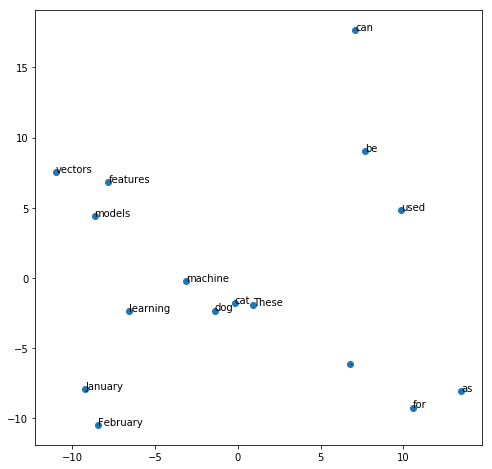

In [4]:
vectors_dimRed = vectors_pca

plt.figure(figsize=(8,8))
x = vectors_dimRed[:,0]
y = vectors_dimRed[:,1]
plt.scatter(x, y);

for i, txt in enumerate(tokens):
    plt.annotate(str(txt), (x[i], y[i]))

# Read data

In [ ]:
##### DOWNLOAD DATASET. ONLY IN COLAB !!!
#!wget -P ./data "https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/4. NLP/data/movieReviews_trainLabel.tsv"

In [5]:
# Loading the spam data
# ham is the label for non-spam messages
df = pd.read_csv("data/movieReviews_trainLabel.tsv", sep="\t", index_col="id")

# Only top 1000
df = df.sample(1000, random_state=0)

# Reviews to embeddings

In [6]:
embeddings = []

with nlp.disable_pipes():
    for text in tqdm(df.review):
        embeddings.append(nlp(text).vector)
    
embeddings = np.array(embeddings)
embeddings.shape

(1000, 96)

# Split data

In [7]:
x_train, x_test, y_train, y_test = train_test_split(embeddings, df["sentiment"],
                                                    test_size=0.2, shuffle=True, random_state=0)

# Model: Linear Support Vector Machine

In [8]:
# Set dual=False to speed up training, and it's not needed
model = LinearSVC(random_state=1, dual=False, max_iter=10000)
model.fit(x_train, y_train)
print(f"Accuracy: {model.score(x_test, y_test) * 100:.3f}%", )

Accuracy: 70.000%
